In [94]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
#import glob
import json
import requests

# *Reading the "csv" files (Registration)* 

In [95]:
df_1= pd.read_csv(r"C:\Users\Dell\JupyterPythoncodes\data\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df_1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000


In [96]:
df_2= pd.read_csv(r"C:\Users\Dell\JupyterPythoncodes\data\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df_2.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0


In [ ]:
df_3= pd.read_csv(r"C:\Users\Dell\JupyterPythoncodes\data\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_3.head(2)

In [ ]:
#df = pd.concat([pd.read_csv(f) for f in glob.glob("./data/*.csv")], ignore_index=True)
# reading the 2012 to 2014
df_4= pd.read_csv(r"C:\Users\Dell\JupyterPythoncodes\data\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_4.head(2)

In [97]:
# reading the 2015 to 2016
df_5= pd.read_csv(r"C:\Users\Dell\JupyterPythoncodes\data\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_5.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0
37152,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0


In [98]:
# reading the 2017 to onwards
df_6= pd.read_csv(r"C:\Users\Dell\JupyterPythoncodes\data\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_6.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
174144,2024-03,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,62 years 08 months,680000.0
174145,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,62 years 07 months,851888.0


In [99]:
#df_1,df_2,df_3 n df_4 does not have a "remaining_lease" column so, I choose the df_5 and df_6 only

#concadinating the df_5 and df_6

df_7= pd.concat([df_5,df_6],axis= 0)
df_7.reset_index(drop= True, inplace= True)
df_7.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [100]:
df_7.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
211297,2024-03,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,62 years 08 months,680000.0
211298,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,62 years 07 months,851888.0


In [101]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211299 entries, 0 to 211298
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                211299 non-null  object 
 1   town                 211299 non-null  object 
 2   flat_type            211299 non-null  object 
 3   block                211299 non-null  object 
 4   street_name          211299 non-null  object 
 5   storey_range         211299 non-null  object 
 6   floor_area_sqm       211299 non-null  float64
 7   flat_model           211299 non-null  object 
 8   lease_commence_date  211299 non-null  int64  
 9   remaining_lease      211299 non-null  object 
 10  resale_price         211299 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 17.7+ MB


In [102]:
df_7.shape

(211299, 11)

In [103]:
df_7.isnull().sum()  # This data set have no null values

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [104]:
# # droping remaining_lease missing values
# df_7 = df_7.dropna()
# df_7.isnull().sum()

# Encoding the categorical column and changing the data type

In [105]:
df_7

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
211294,2024-03,YISHUN,4 ROOM,501A,YISHUN ST 51,10 TO 12,92.0,Model A,2018,92 years 11 months,623000.0
211295,2024-03,YISHUN,4 ROOM,841,YISHUN ST 81,01 TO 03,104.0,Model A,1988,62 years 11 months,575000.0
211296,2024-03,YISHUN,5 ROOM,428A,YISHUN AVE 11,04 TO 06,112.0,Improved,2015,90 years 01 month,663000.0
211297,2024-03,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,62 years 08 months,680000.0


In [106]:
# Creating a new column "address"
df_7["address"]= df_7["block"]+" "+df_7["street_name"]

In [107]:
#droping the "street_name" and "block"
df_7= df_7.drop(columns=["block","street_name"])

In [108]:
df_7.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10


In [109]:
# for month
df_7["month"] = pd.to_datetime(df_7["month"], format="%Y-%m")

In [110]:
#spliting the month column to "Year", "month", "day"
df_7["year"]= df_7["month"].dt.year
df_7["month"]= df_7["month"].dt.month

In [111]:
df_7["year"]

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
211294    2024
211295    2024
211296    2024
211297    2024
211298    2024
Name: year, Length: 211299, dtype: int32

In [112]:
df_7.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015
2,1,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4,2015
3,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10,2015
4,1,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10,2015


In [113]:
df_7["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [114]:
df_7["town"].nunique()

26

In [115]:
df_7["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [116]:
df_7["flat_type"].nunique()

7

In [117]:
df_7["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [118]:
df_7["flat_model"].nunique()

21

In [119]:
df_7["year"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [120]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_7["town"]= LabelEncoder().fit_transform(df_7["town"])
df_7["flat_model"]= OrdinalEncoder().fit_transform(df_7[["flat_model"]])
df_7["flat_type"]= OrdinalEncoder().fit_transform(df_7[["flat_type"]])

In [121]:
df_7["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [122]:
df_7["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [123]:
df_7["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [124]:
df_7.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
211297,3,25,4.0,10 TO 12,121.0,5.0,1987,62 years 08 months,680000.0,637 YISHUN ST 61,2024
211298,3,25,5.0,10 TO 12,146.0,3.0,1987,62 years 07 months,851888.0,791 YISHUN AVE 2,2024


In [125]:
df_7["address"].nunique()

9576

In [190]:
df_7["storey_range"]

KeyError: 'storey_range'

In [127]:
df_7 = df_7.rename(columns={'storey_range':'storey'})

In [133]:
#df_7["storey_range"].unique()
df_7.tail(2)

,month,town,flat_type,storey,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
211297,3,25,4.0,12,121.0,5.0,1987,62 years 08 months,680000.0,637 YISHUN ST 61,2024
211298,3,25,5.0,12,146.0,3.0,1987,62 years 07 months,851888.0,791 YISHUN AVE 2,2024


In [136]:
#df_7[["storey_start", "storey_end"]]= df_7["storey_range"].str.split(" TO ",expand=True)
# I assume that rather we use floor range, I the possible highest floor within the unit storey range.
df_7['storey'] = df_7["storey"].str[-2:].astype('int')

AttributeError: Can only use .str accessor with string values!

In [137]:
#droping the "storey_range" column
df_7.drop(columns=["storey_range"],inplace= True)

KeyError: "['storey_range'] not found in axis"

In [138]:
df_7.head(2)

,month,town,flat_type,storey,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,0,2.0,9,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,0,2.0,3,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [139]:
df_7["address"].nunique()

9576

In [140]:
#df_7["storey_start"].unique()

KeyError: 'storey_start'

In [ ]:
#df_7["storey_start"].nunique()

In [ ]:
#df_7["storey_end"].unique()

In [141]:
# Address have9576 unique values in the  211299 , so i encode it for the correlation checking
# I am chooshing the "LabelEncoder" for the "address" column

df_7["address"]= LabelEncoder().fit_transform(df_7["address"])

In [142]:
# df_7["storey_start"]= df_7["storey_start"].astype(int)
# df_7["storey_end"]= df_7["storey_end"].astype(int)

KeyError: 'storey_start'

In [143]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_7["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [144]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [145]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [146]:
#droping the "remaining_lease" column
df_7.drop(columns=["remaining_lease"],inplace= True)

In [147]:
df_8= pd.concat([df_7,df_data],axis=1)

In [148]:
df_8.columns

Index(['month', 'town', 'flat_type', 'storey', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'remaining_lease_year', 'remaining_lease_month'],
      dtype='object')

In [149]:
df_8["remaining_lease_year"].unique()

array([70, 65, 64, 63, 62, 69, 60, 61, 86, 77, 80, 90, 87, 66, 58, 94, 71,
       68, 84, 73, 79, 76, 72, 82, 74, 67, 88, 81, 89, 53, 54, 55, 57, 93,
       83, 85, 92, 91, 59, 95, 52, 51, 56, 75, 96, 78, 50, 97, 49, 48, 47,
       46, 45, 44, 43, 42, 41])

In [150]:
df_8["remaining_lease_month"].unique()

array([ 0,  4,  7,  5,  1,  6,  8, 10,  3,  9, 11,  2])

In [152]:
# set the columns
df_9= df_8[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [153]:
df_10=df_9.sort_values(by=["year","month"])

In [154]:
df_10.to_csv("ResaleFlatPrices.csv", index= False)

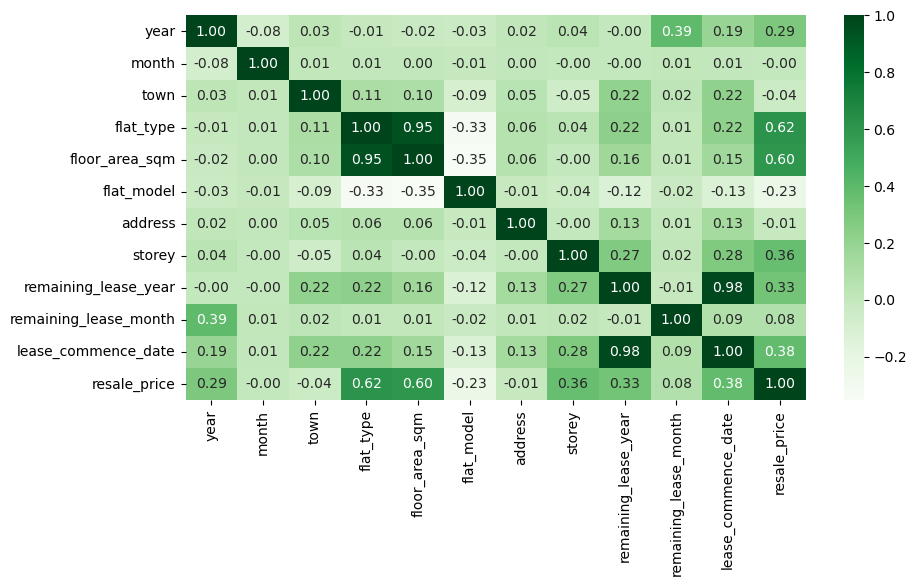

In [155]:
# Checking the Correlation using heatmap

df_10_corr= df_10.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_10_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [156]:
df_final= pd.read_csv(r"C:\Users\Dell\JupyterPythoncodes\ResaleFlatPrices.csv")
df_final.head()

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1634,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6588,3,65,0,1981,275000.0
2,2015,1,0,2.0,69.0,12.0,1465,3,64,0,1980,285000.0
3,2015,1,0,2.0,68.0,12.0,5429,3,63,0,1979,290000.0
4,2015,1,0,2.0,68.0,12.0,6742,9,64,0,1980,290000.0


In [157]:
# checking the duplicate values
df_final.duplicated().sum()

307

In [158]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)

In [159]:
df_final_1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
210990,2024,3,25,4.0,121.0,5.0,7418,12,62,8,1987,680000.0
210991,2024,3,25,5.0,146.0,3.0,8649,12,62,7,1987,851888.0


In [160]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns

In [161]:
df_final_2= df_final_1.drop(columns=["month","address"])

In [185]:
df_final_2.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
210990,2024,3,25,4.0,121.0,5.0,7418,2.484907,62,8,1987,2.597480
210991,2024,3,25,5.0,146.0,3.0,8649,2.484907,62,7,1987,2.614121


In [186]:
# detecting the skewed columns using plot
def plot(df,column):
    #distplot
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.distplot(df[column])
    plt.title("distplot for"+" "+column)

    #histogram plot

    plt.subplot(1,3,2)
    sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
    plt.title("histogram plot for"+" "+column)

    #boxplot

    plt.subplot(1,3,3)

    sns.boxplot(df, x=column)
    plt.title("Box plot for"+" "+column)

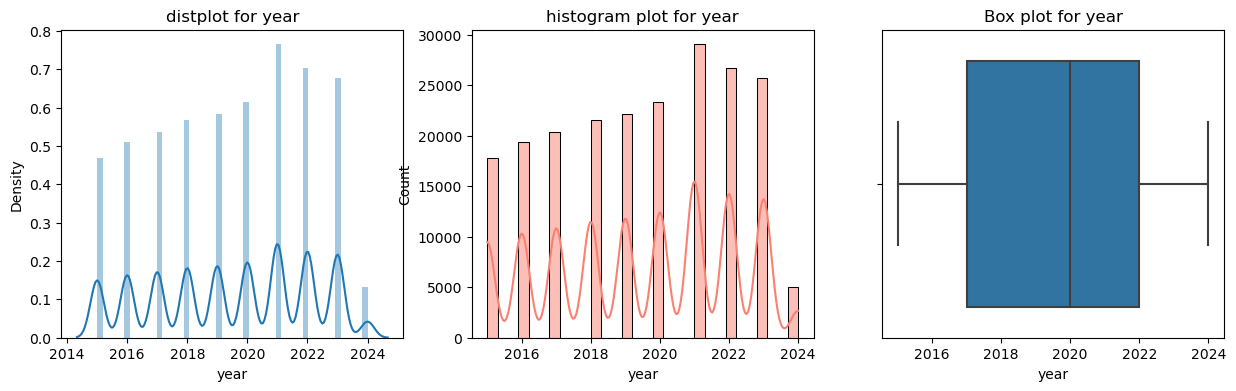

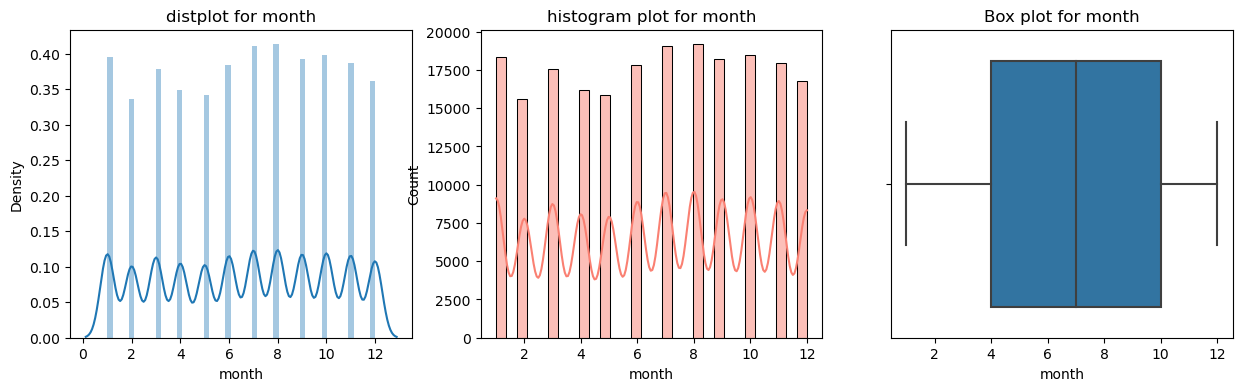

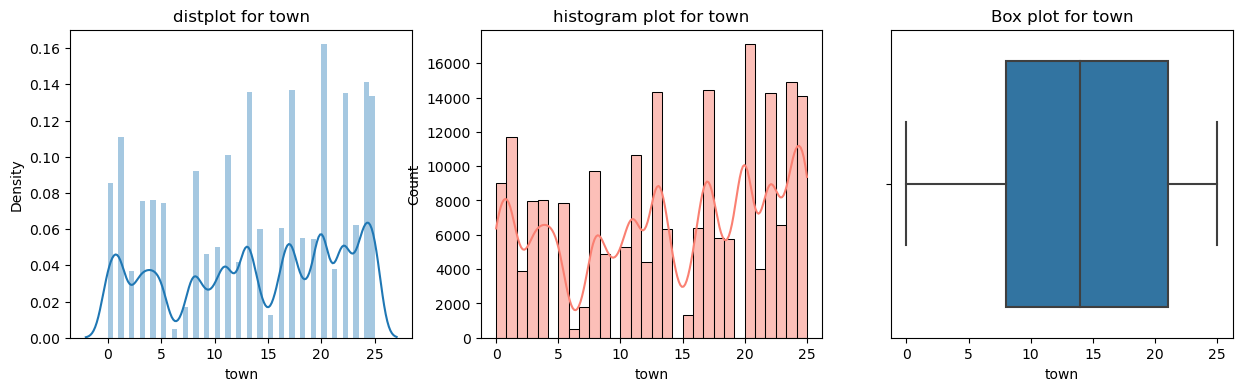

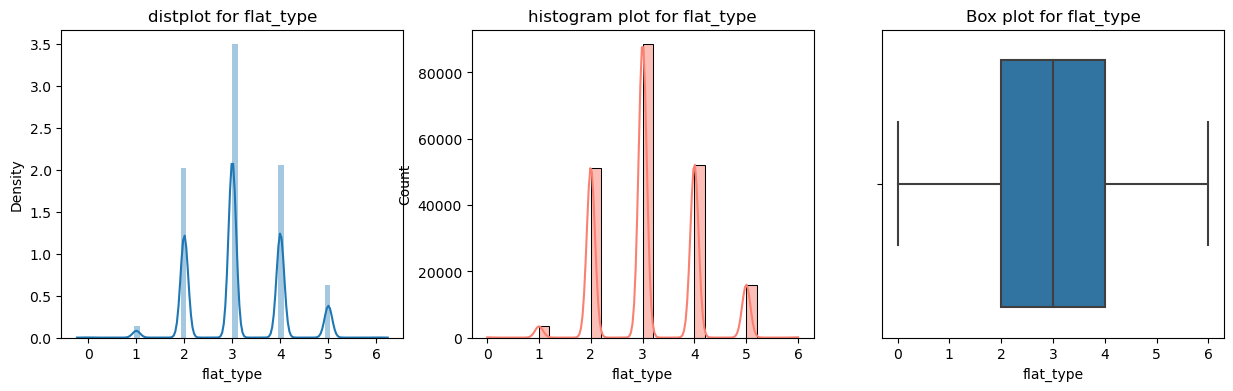

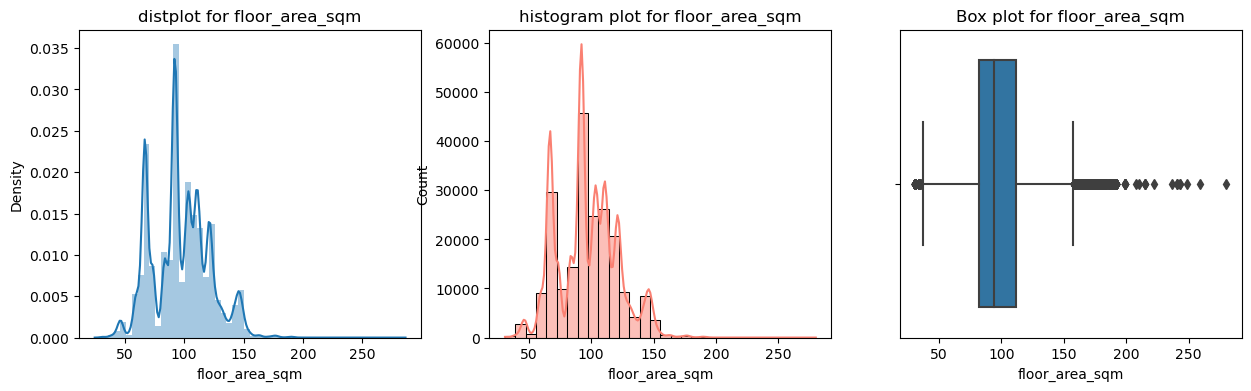

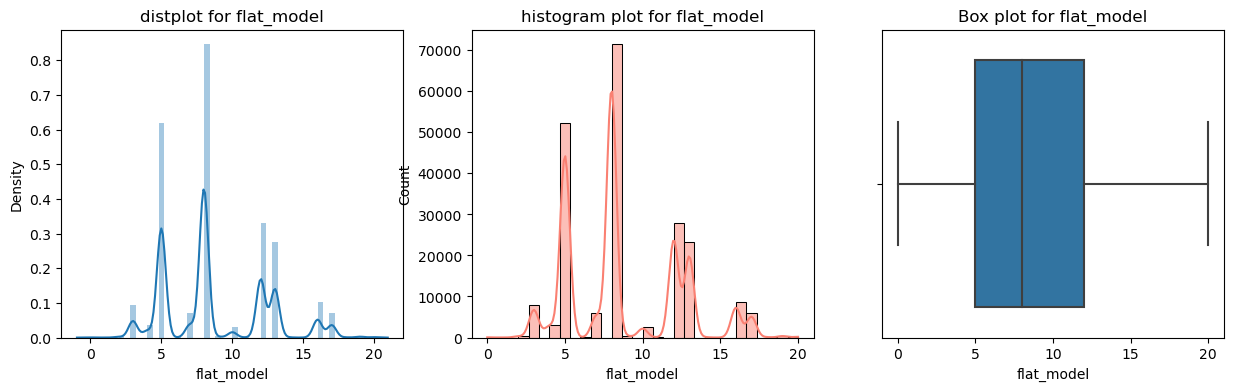

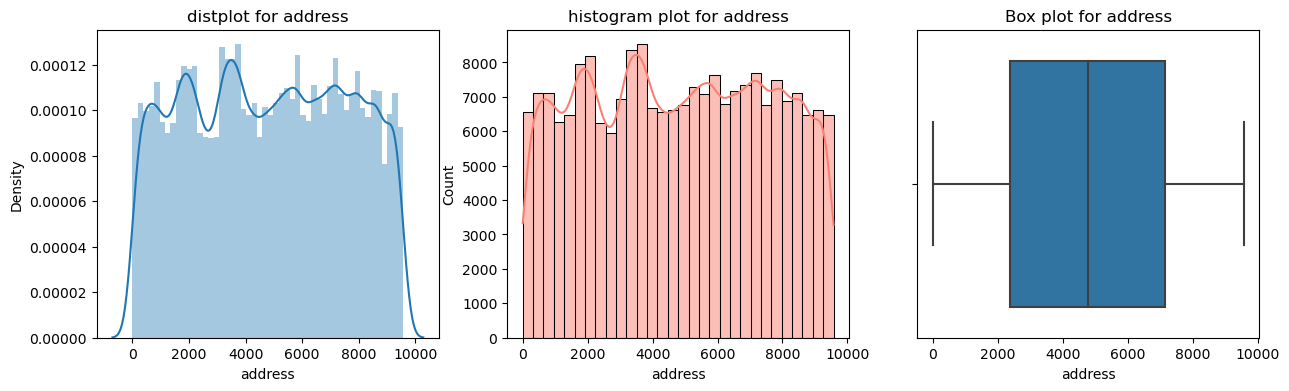

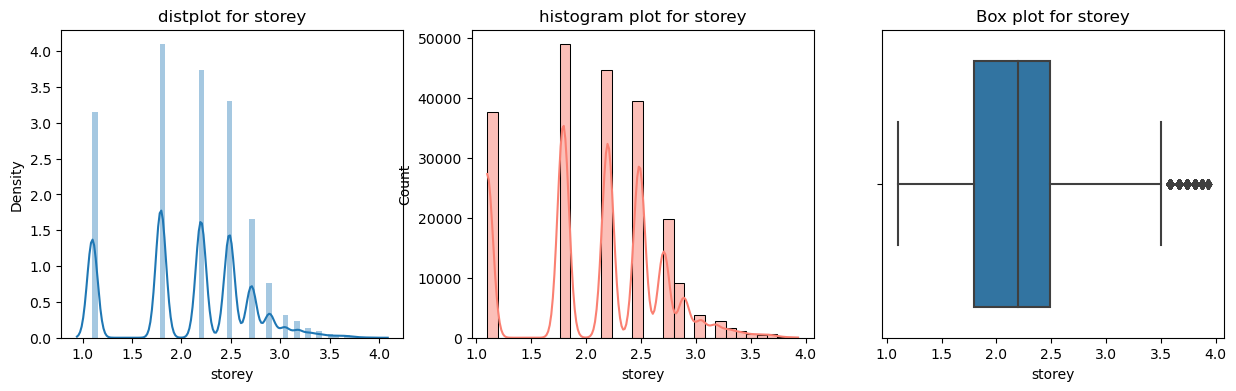

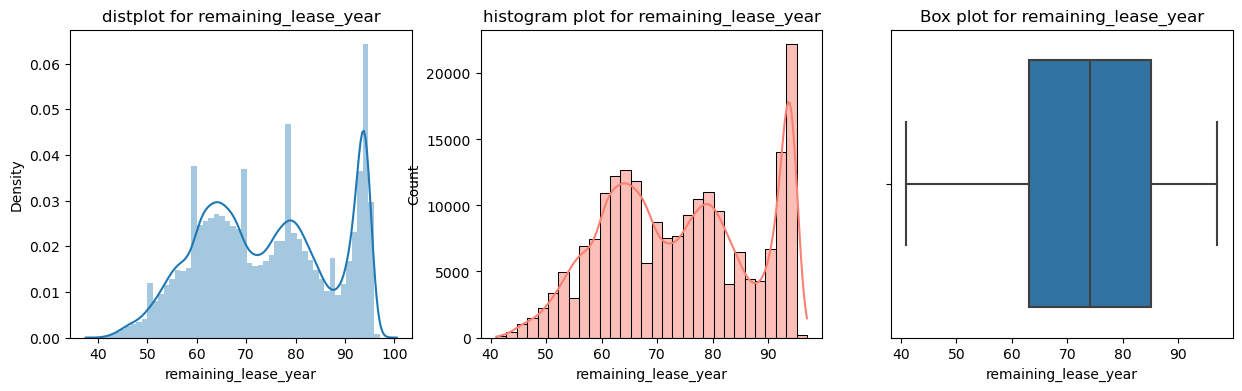

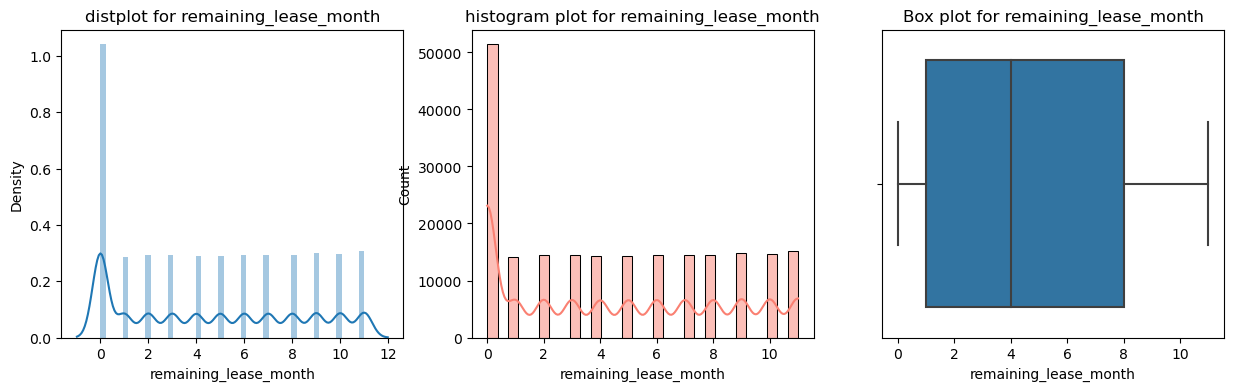

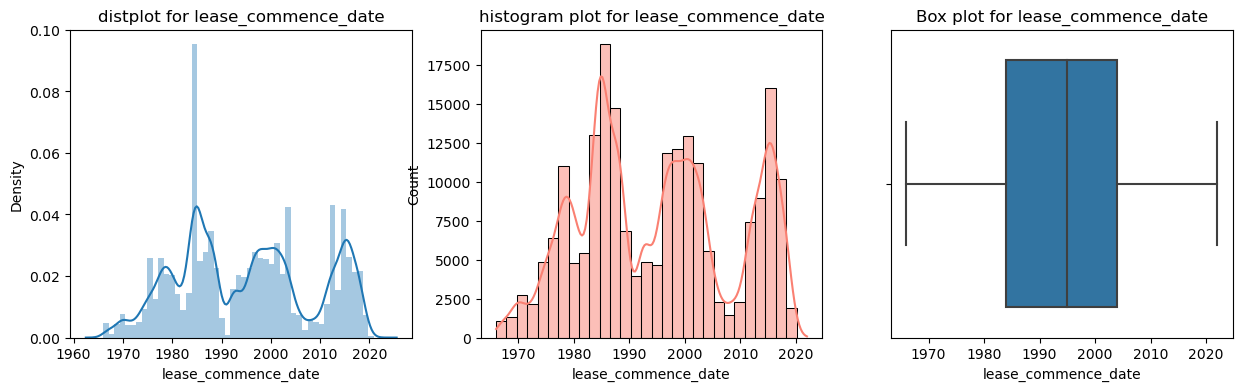

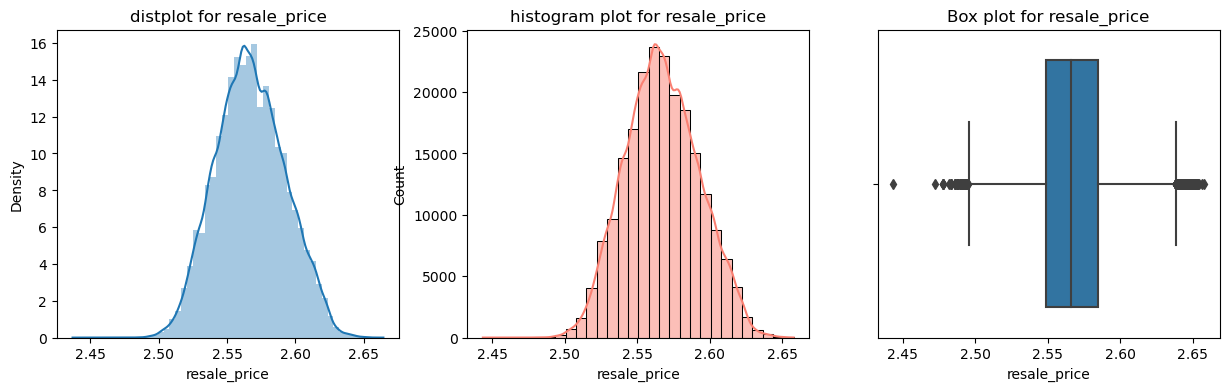

In [187]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [188]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,210992.0,2019.464809,2.605437,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
month,210992.0,6.573249,3.431252,1.000000,4.000000,7.000000,10.000000,12.000000
town,210992.0,13.895754,7.956726,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,210992.0,3.123204,0.919061,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,210992.0,97.200938,24.057279,31.000000,82.000000,94.000000,112.000000,280.000000
flat_model,210992.0,8.696135,3.651802,0.000000,5.000000,8.000000,12.000000,20.000000
address,210992.0,4780.323202,2734.230880,0.000000,2377.000000,4788.000000,7151.000000,9575.000000
storey,210992.0,2.094425,0.603468,1.098612,1.791759,2.197225,2.484907,3.931826
remaining_lease_year,210992.0,74.144484,13.412432,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,210992.0,4.569770,3.786648,0.000000,1.000000,4.000000,8.000000,11.000000


## skewness handling

In [166]:
df_final_3= df_final_2.copy()

In [167]:
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price

In [170]:
# df_final_2["storey_start"]= np.log(df_final_2["storey_start"])
df_final_3["storey"]= np.log(df_final_3["storey"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])

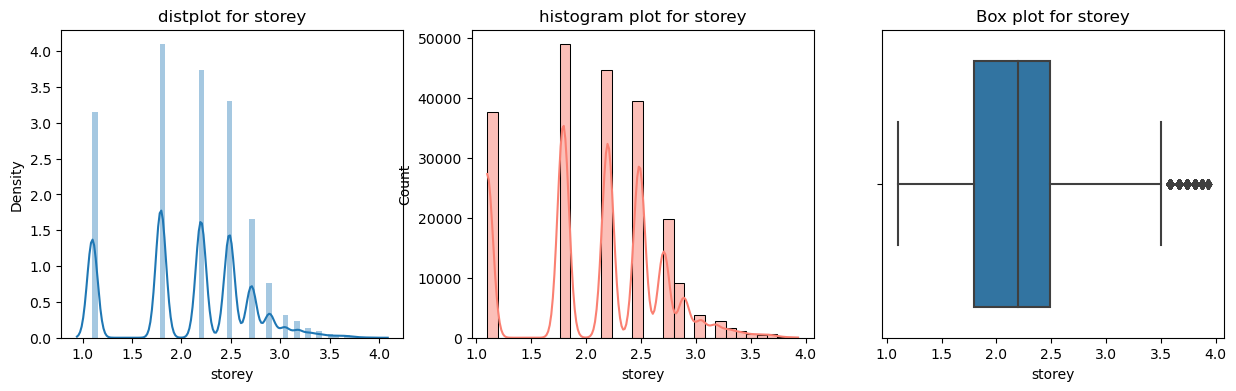

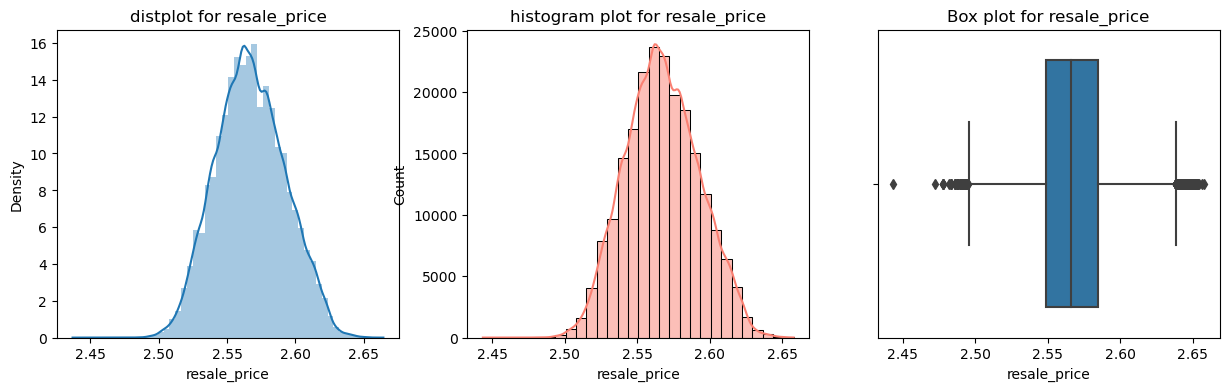

In [172]:
skewed_columns=["storey","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

## Outliers Handling - Interquartile Range(IQR) Method

In [173]:
df_final_4= df_final_3.copy()

In [174]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers

In [175]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [176]:
def outlier(df,column):
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.75)

    iqr= q3-q1

    upper_threshold= q3 + (1.5*iqr)
    lower_threshold= q1 - (1.5*iqr)

    df[column]= df[column].clip(lower_threshold, upper_threshold)

In [178]:
outlier_columns=["floor_area_sqm","storey","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

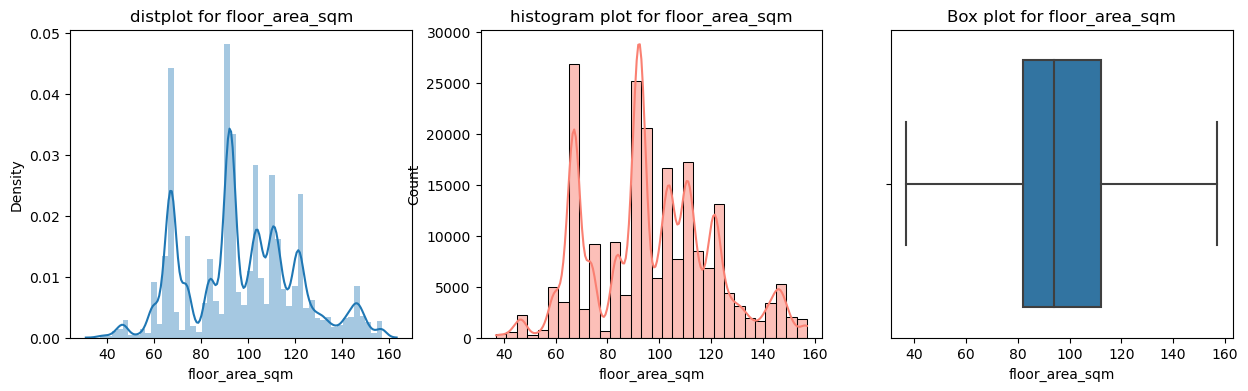

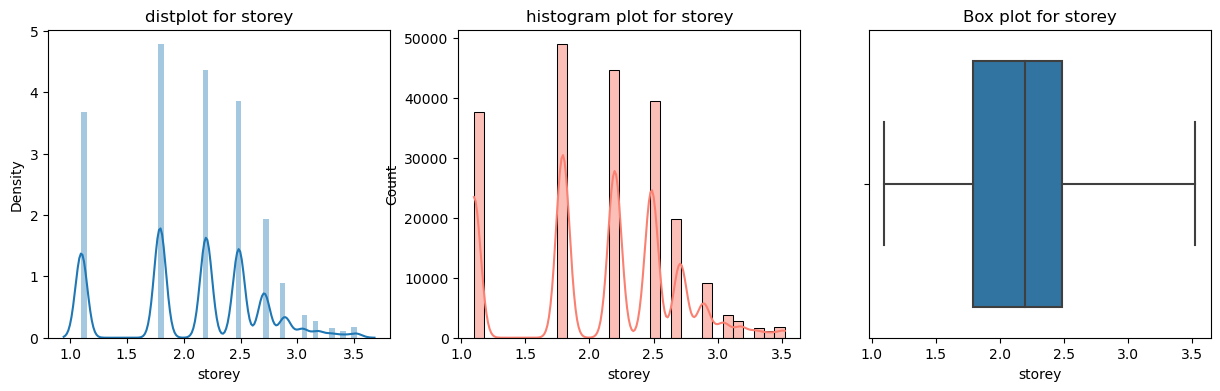

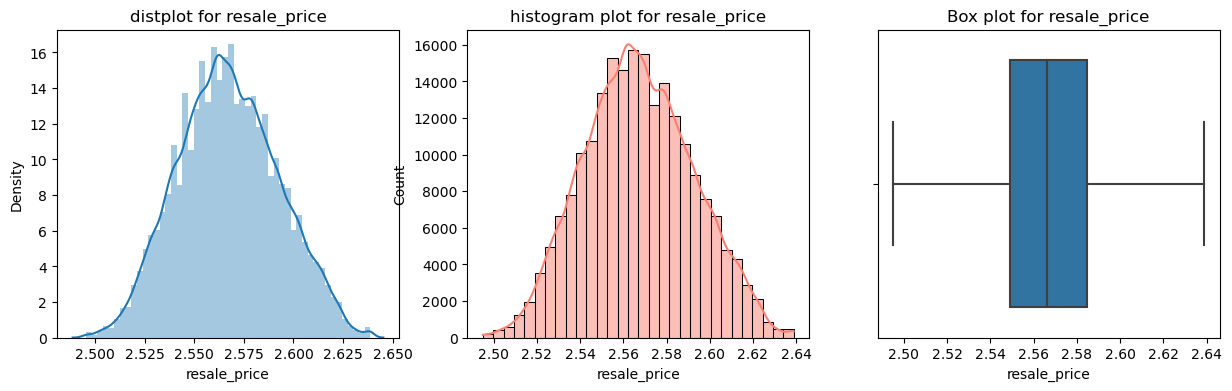

In [179]:
for k in outlier_columns:
    plot(df_final_4,k)

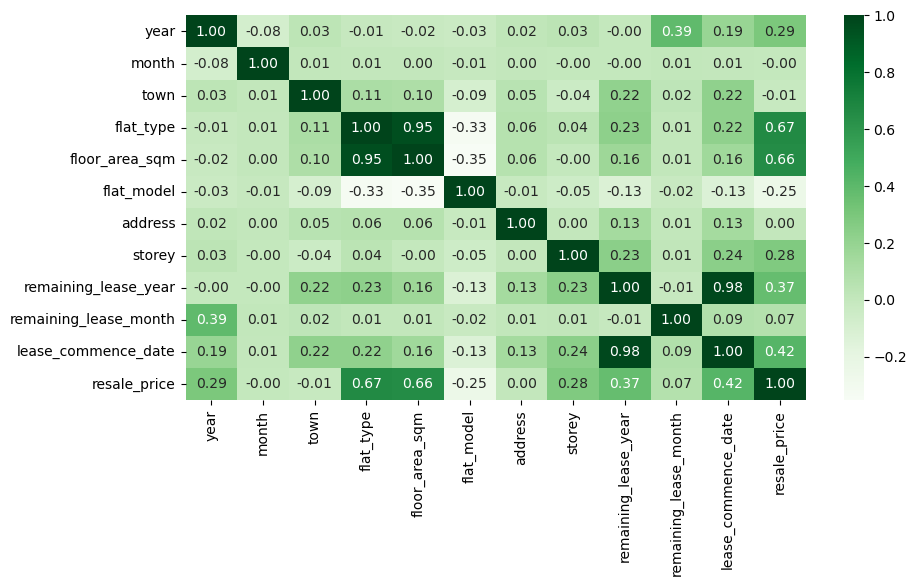

In [180]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

## Model Selection (Regression)

In [181]:
df_final_5= df_final_4.copy()

In [182]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,210992.0,2019.464809,2.605437,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
month,210992.0,6.573249,3.431252,1.000000,4.000000,7.000000,10.000000,12.000000
town,210992.0,13.895754,7.956726,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,210992.0,3.123204,0.919061,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,210992.0,97.120504,23.798215,37.000000,82.000000,94.000000,112.000000,157.000000
flat_model,210992.0,8.696135,3.651802,0.000000,5.000000,8.000000,12.000000,20.000000
address,210992.0,4780.323202,2734.230880,0.000000,2377.000000,4788.000000,7151.000000,9575.000000
storey,210992.0,2.093564,0.601289,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,210992.0,74.144484,13.412432,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,210992.0,4.569770,3.786648,0.000000,1.000000,4.000000,8.000000,11.000000


In [183]:
np.exp(2.638833)

13.996859737626473

In [184]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 13]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1634,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6588,3,65,0,1981,275000.0
2,2015,1,0,2.0,69.0,12.0,1465,3,64,0,1980,285000.0
3,2015,1,0,2.0,68.0,12.0,5429,3,63,0,1979,290000.0
4,2015,1,0,2.0,68.0,12.0,6742,9,64,0,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210987,2024,3,25,3.0,92.0,8.0,6057,12,92,11,2018,623000.0
210988,2024,3,25,3.0,104.0,8.0,8954,3,62,11,1988,575000.0
210989,2024,3,25,4.0,112.0,5.0,5186,6,90,1,2015,663000.0
210990,2024,3,25,4.0,121.0,5.0,7418,12,62,8,1987,680000.0


In [ ]:
np.exp(12.091460)

In [ ]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 178342]

In [ ]:
!pip install xgboost

In [ ]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [ ]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [ ]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

In [ ]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

In [ ]:
df_final_5.iloc[10456]

In [ ]:
np.exp(12.815838)

In [ ]:
user_data = np.array([[2015,8,4,2,74,8,412,0.011858,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

In [ ]:
np.exp(12.805541354416803)

In [ ]:
# Saving the Model using pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
    pickle.dump(model_1,f)

In [ ]:
import pickle
import numpy as np

In [ ]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [ ]:
user_data = np.array([[2015,8,5,4,122,5,4986,1,3,72,0,1989]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

In [ ]:
np.exp(13.136544663889385)